# Principle Component Analysis

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a dataset with potentially correlated features into a set of linearly uncorrelated variables called principal components. These components are ordered such that the first few retain most of the variation present in the original dataset.

### Why PCA is Needed
- **Dimensionality Reduction**: High-dimensional data can be computationally expensive and may lead to overfitting. PCA reduces the number of features while preserving as much information as possible.
- **Visualization**: PCA helps in visualizing high-dimensional data by projecting it into 2D or 3D space.
- **Noise Reduction**: By focusing on the principal components, PCA can filter out noise and irrelevant features.

### Pros
- Simplifies complex datasets, making them easier to analyze.
- Reduces computational cost for machine learning algorithms.
- Helps in identifying patterns and relationships in data.

### Cons
- PCA is sensitive to scaling; features need to be standardized.
- It may discard features that are important for specific tasks but have low variance.
- The principal components are linear combinations of original features, making them harder to interpret.

In [76]:
# this section adds the package path to the system path so it can be used here
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))


import mltoolbox as ml # my module

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [77]:
# Load the CSV file into a pandas DataFrame
D = pd.read_csv('../../Datasets/seeds_dataset.csv', delimiter=r'\s+', names=[
    'area',
    'perimeter', 
    'compactness', 
    'length_of_kernel', 
    'width_of_kernel', 
    'asymmetry', 
    'length_of_kernel_groove', 
    'class'])


# so our lable is the class column,
y = D['class'].to_numpy()
X_2 = D[['area', 'asymmetry']].values
X = D[['area',
    'perimeter', 
    'compactness', 
    'length_of_kernel', 
    'width_of_kernel', 
    'asymmetry', 
    'length_of_kernel_groove']].values

In [78]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

per_var = [7.187e+01 1.711e+01 9.690e+00 9.800e-01 2.700e-01 8.000e-02 1.000e-02] 



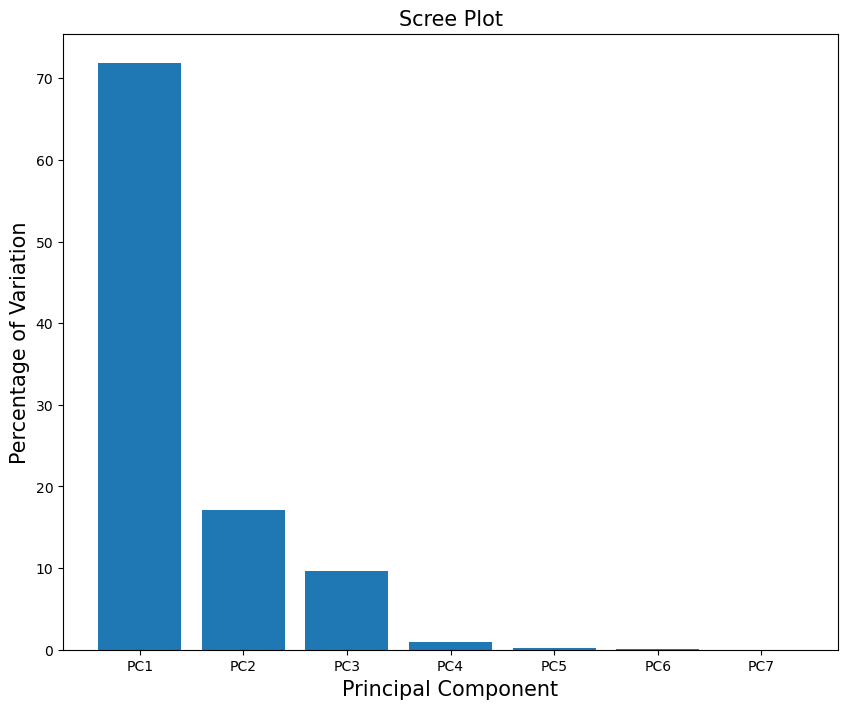

In [79]:
# Create a bar chart for the above array
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1,8)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 8), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [80]:

features = ['area',
    'perimeter', 
    'compactness', 
    'length_of_kernel', 
    'width_of_kernel', 
    'asymmetry', 
    'length_of_kernel_groove']

pd.DataFrame(data = pca.components_, columns = labels, index = features)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
area,0.444474,0.441571,0.277017,0.423563,0.432819,-0.118692,0.387161
perimeter,0.026564,0.084003,-0.529151,0.205975,-0.116690,0.716882,0.377193
compactness,0.025871,-0.059839,0.629692,-0.211880,0.216483,0.679506,-0.213897
length_of_kernel,-0.193640,-0.295457,0.332816,-0.263407,-0.199630,-0.092465,0.804150
width_of_kernel,-0.204412,-0.174276,0.332655,0.766098,-0.465366,0.036258,-0.111347
asymmetry,-0.426437,-0.476239,-0.141629,0.273576,0.703012,-0.019642,0.042830
length_of_kernel_groove,0.734806,-0.670752,-0.072553,0.046276,-0.039289,-0.003723,-0.034498


In [81]:
# we use pca.transform to see how our data looks like in the new coordinate system

# this will be used later to plot our data in the first two coordinates PC1, PC2

pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.317047,-0.783669,-0.631010,-0.416846,0.107496,0.022570,-0.014697
1,-0.003386,-1.913214,-0.669754,-0.433071,-0.044406,0.018921,-0.005479
2,-0.459443,-1.907225,0.932489,-0.111292,0.008222,-0.051313,-0.004177
3,-0.591936,-1.931069,0.499311,-0.228977,-0.074853,0.229500,-0.010051
4,1.102910,-2.068090,0.056705,-0.142421,-0.018775,0.052639,-0.000622
...,...,...,...,...,...,...,...
205,-1.991107,-0.865956,0.513303,0.150394,0.083427,-0.024834,0.020125
206,-2.726865,0.208190,-0.059059,0.175083,0.031480,0.053960,0.034201
207,-1.403633,1.298593,2.905811,-0.055774,0.024476,0.083032,-0.032326
208,-2.339328,-0.099699,-0.382515,0.143153,-0.058363,-0.051032,0.013952


In [82]:
projected_df = pd.concat([pca_df, D["class"]], axis = 1)
projected_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,class
0,0.317047,-0.783669,-0.631010,-0.416846,0.107496,0.022570,-0.014697,1
1,-0.003386,-1.913214,-0.669754,-0.433071,-0.044406,0.018921,-0.005479,1
2,-0.459443,-1.907225,0.932489,-0.111292,0.008222,-0.051313,-0.004177,1
3,-0.591936,-1.931069,0.499311,-0.228977,-0.074853,0.229500,-0.010051,1
4,1.102910,-2.068090,0.056705,-0.142421,-0.018775,0.052639,-0.000622,1
...,...,...,...,...,...,...,...,...
205,-1.991107,-0.865956,0.513303,0.150394,0.083427,-0.024834,0.020125,3
206,-2.726865,0.208190,-0.059059,0.175083,0.031480,0.053960,0.034201,3
207,-1.403633,1.298593,2.905811,-0.055774,0.024476,0.083032,-0.032326,3
208,-2.339328,-0.099699,-0.382515,0.143153,-0.058363,-0.051032,0.013952,3


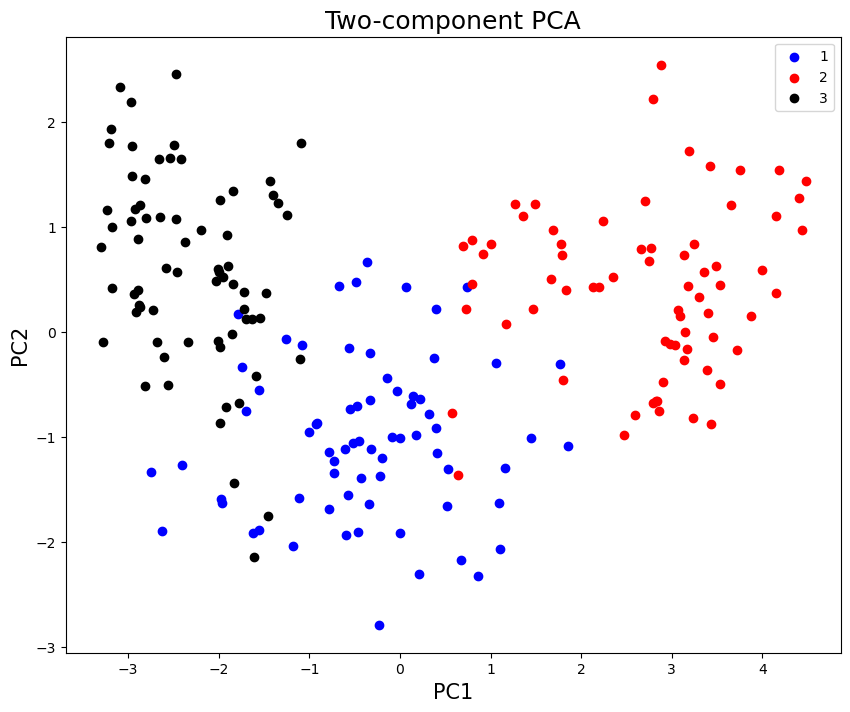

In [83]:
targets = [1,2,3]
colors = ["blue", "red", "black"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df['class'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()

### Compared To just 2 data dimensions

Area and Asymmetry

The clusters are slightly more separated, but it is not a major difference. This is largely due to the Asymmetry data being the most imortant, with it having the largest weights for PC1 and PC2. If we replace Asymmetry with a less important value like length_of_kernel we see that the data collapses down to a stright line. So the PC1 and PC2 __are__ representing the components with the most variance.

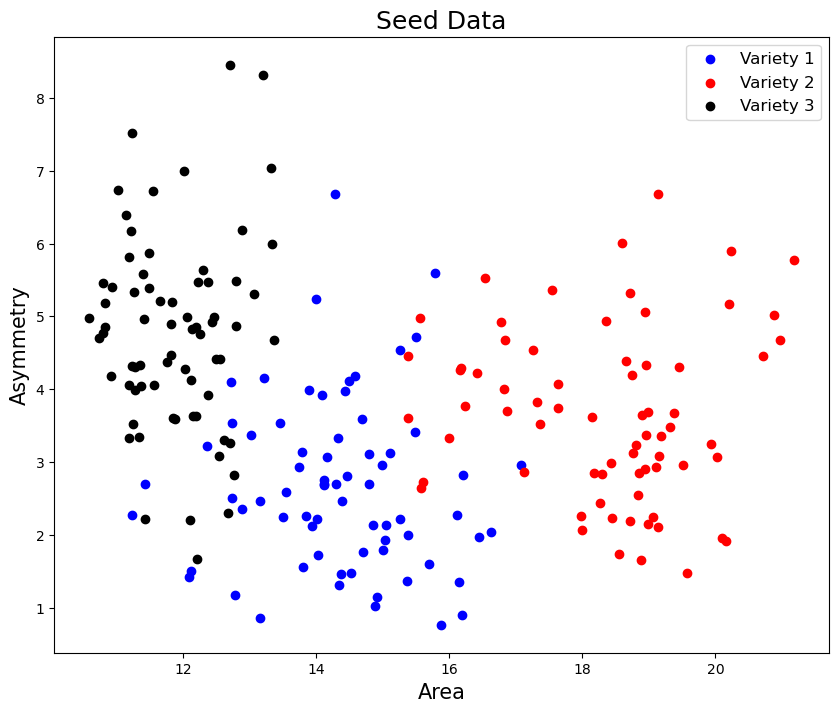

In [84]:
plt.figure(figsize=(10, 8))
plt.title("Seed Data", fontsize=18)
plt.scatter(X_2[y == 1, 0], X_2[y == 1, 1], c='blue', label='Variety 1')
plt.scatter(X_2[y == 2, 0], X_2[y == 2, 1], c='red', label='Variety 2')
plt.scatter(X_2[y == 3, 0], X_2[y == 3, 1], c='black', label='Variety 3')
plt.xlabel("Area", fontsize=15)
plt.ylabel("Asymmetry", fontsize=15)
plt.legend(fontsize=12)
plt.show()

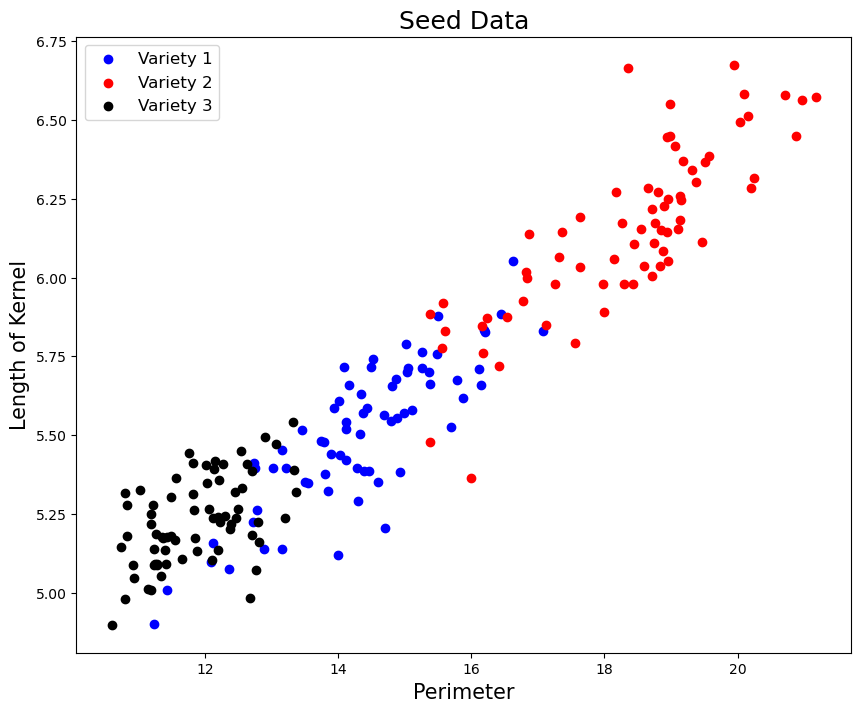

In [85]:
X_2 = D[['area', 'length_of_kernel']].values

plt.figure(figsize=(10, 8))
plt.title("Seed Data", fontsize=18)
plt.scatter(X_2[y == 1, 0], X_2[y == 1, 1], c='blue', label='Variety 1')
plt.scatter(X_2[y == 2, 0], X_2[y == 2, 1], c='red', label='Variety 2')
plt.scatter(X_2[y == 3, 0], X_2[y == 3, 1], c='black', label='Variety 3')
plt.xlabel("Perimeter", fontsize=15)
plt.ylabel("Length of Kernel", fontsize=15)
plt.legend(fontsize=12)
plt.show()

### Direct Relationship

The data above is tightly fitted to a single, straight line. What this means is that there is no new information that is gained from having both pf these data values. If you know the perimeter, you effectively know the length of the kernel. This is the data the PCA reduces, eliminating redundancies that make the model more expensive to solve.